# Comparison in metrics: AI-ness

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read file
df = pd.read_parquet("/share/yin/kk929_codes/schmidt/intermediates/20251111_dimension_similarities.parquet")
df.head()

,id,Name,doi,year,researcher_id,title_preferred,abstract_preferred,for_first_level,for_second_level,l2_similarities,cos_similarities
0,pub.1144121389,Yao Yu,10.1002/essoar.10508279.2,2021.0,ur.012443735304.38,Improved Bathymetric Prediction using Geologic...,None,None,None,10.109487,0.998029
1,pub.1170962708,Md Abdul Halim,10.1016/j.scitotenv.2024.172666,2024.0,ur.012551357145.32,"Large, sustained soil CO2 efflux but rapid rec...","The net effect of forest disturbances, such as...","[{'id': '80001', 'code': '30', 'name': 'Agricu...","[{'id': '80030', 'code': '3007', 'name': 'Fore...",10.706790,0.999846
2,pub.1138897652,Kilian Stenning,10.1021/acsnano.1c02537,2021.0,ur.013743527603.86,Comparison of Spin-Wave Modes in Connected and...,Artificial spin ice systems have seen burgeoni...,"[{'id': '80022', 'code': '51', 'name': 'Physic...","[{'id': '80222', 'code': '5103', 'name': 'Clas...",3.862418,0.999325
3,pub.1187545853,Felipe Siqueira Pacheco,10.1609/aaai.v39i27.35019,2025.0,ur.012044451635.21,Constraint-aware Pareto Optimization for Tree-...,Addressing global sustainability challenges as...,"[{'id': '80019', 'code': '48', 'name': 'Law an...","[{'id': '80201', 'code': '4802', 'name': 'Envi...",10.879473,0.979394
4,pub.1187545853,Sebastian Heilpern,10.1609/aaai.v39i27.35019,2025.0,ur.012541317137.51,Constraint-aware Pareto Optimization for Tree-...,Addressing global sustainability challenges as...,"[{'id': '80019', 'code': '48', 'name': 'Law an...","[{'id': '80201', 'code': '4802', 'name': 'Envi...",10.885564,0.978769


---

## Descriptive Analysis l2_similarities and cos_similarities

Smaller values (~0) are more closely related to AI field in L2, while larger values (~1) are in Cosine similarity. 

- Lower L2 → closer to AI
- Higher cosine → closer to AI

In [4]:
print("=== L2 Similarity Stats ===")
print(df["l2_similarities"].describe())
print()

print("=== Cosine Similarity Stats ===")
print(df["cos_similarities"].describe())
print()

=== L2 Similarity Stats ===
count    1495.000000
mean        8.963116
std         3.434725
min         3.149093
25%         5.794220
50%         8.935834
75%        11.504214
max        16.038294
Name: l2_similarities, dtype: float64

=== Cosine Similarity Stats ===
count    1495.000000
mean        0.983488
std         0.021334
min         0.872084
25%         0.976749
50%         0.989825
75%         0.997648
max         1.000000
Name: cos_similarities, dtype: float64



---

## Classifying distributions of High and Medium Similarities

To compare the distributions of L2 and Cosine similarities, we define thresholds for high and medium similarities. 
From the statistics above, we set the following thresholds:
- L2_high_threshold = 6           (rounded around the 25% quartile)
- L2_medium_threshold = 11.5      (rounded around the 75% quartile)
- Cosine_high_threshold = 0.99
- Cosine_medium_threshold = 0.97

In [5]:
# Thresholds based on distribution quartiles
L2_HIGH = 6          # High similarity (very close to AI field)
L2_MED = 11.5        # Medium similarity cutoff

def classify_l2(x):
    if x <= L2_HIGH:
        return "High similarity"
    elif x <= L2_MED:
        return "Medium similarity"
    else:
        return "Low similarity"

df["L2_category"] = df["l2_similarities"].apply(classify_l2)

COS_MED = 0.97       # Medium similarity cutoff
COS_HIGH = 0.99      # High similarity cutoff

def classify_cos(x):
    if x >= COS_HIGH:
        return "High similarity"
    elif x >= COS_MED:
        return "Medium similarity"
    else:
        return "Low similarity"

df["Cos_category"] = df["cos_similarities"].apply(classify_cos)

output_path = "/share/yin/nz268/similarity_categorized.csv"
df.to_csv(output_path, index=False)

print("Saved categorized file to:", output_path)
df.head()

Saved categorized file to: /share/yin/nz268/similarity_categorized.csv


,id,Name,doi,year,researcher_id,title_preferred,abstract_preferred,for_first_level,for_second_level,l2_similarities,cos_similarities,L2_category,Cos_category
0,pub.1144121389,Yao Yu,10.1002/essoar.10508279.2,2021.0,ur.012443735304.38,Improved Bathymetric Prediction using Geologic...,None,None,None,10.109487,0.998029,Medium similarity,High similarity
1,pub.1170962708,Md Abdul Halim,10.1016/j.scitotenv.2024.172666,2024.0,ur.012551357145.32,"Large, sustained soil CO2 efflux but rapid rec...","The net effect of forest disturbances, such as...","[{'id': '80001', 'code': '30', 'name': 'Agricu...","[{'id': '80030', 'code': '3007', 'name': 'Fore...",10.706790,0.999846,Medium similarity,High similarity
2,pub.1138897652,Kilian Stenning,10.1021/acsnano.1c02537,2021.0,ur.013743527603.86,Comparison of Spin-Wave Modes in Connected and...,Artificial spin ice systems have seen burgeoni...,"[{'id': '80022', 'code': '51', 'name': 'Physic...","[{'id': '80222', 'code': '5103', 'name': 'Clas...",3.862418,0.999325,High similarity,High similarity
3,pub.1187545853,Felipe Siqueira Pacheco,10.1609/aaai.v39i27.35019,2025.0,ur.012044451635.21,Constraint-aware Pareto Optimization for Tree-...,Addressing global sustainability challenges as...,"[{'id': '80019', 'code': '48', 'name': 'Law an...","[{'id': '80201', 'code': '4802', 'name': 'Envi...",10.879473,0.979394,Medium similarity,Medium similarity
4,pub.1187545853,Sebastian Heilpern,10.1609/aaai.v39i27.35019,2025.0,ur.012541317137.51,Constraint-aware Pareto Optimization for Tree-...,Addressing global sustainability challenges as...,"[{'id': '80019', 'code': '48', 'name': 'Law an...","[{'id': '80201', 'code': '4802', 'name': 'Envi...",10.885564,0.978769,Medium similarity,Medium similarity


## <span style="color:yellow">New Updates</span>

### Comparison of Normalized AI-ness Ranks: L2 vs Cosine Similarity

We rank each paper based on its L2 and Cosine similarity values:

- **L2 similarity:** Smaller values indicate closer relation to AI. We invert the ranking so that higher normalized rank = more AI-related.
- **Cosine similarity:** Larger values indicate closer relation to AI. Normalized rank directly represents AI-relatedness.

Both metrics are scaled to a 0-1 range for easy comparison.  

The scatter plot below shows **Cosine rank (x-axis)** vs **L2 rank (y-axis)**.  

- Points near the diagonal line indicate agreement between the two metrics.
- Points above the line: L2 considers the paper more AI-related than Cosine.
- Points below the line: Cosine considers the paper more AI-related than L2.

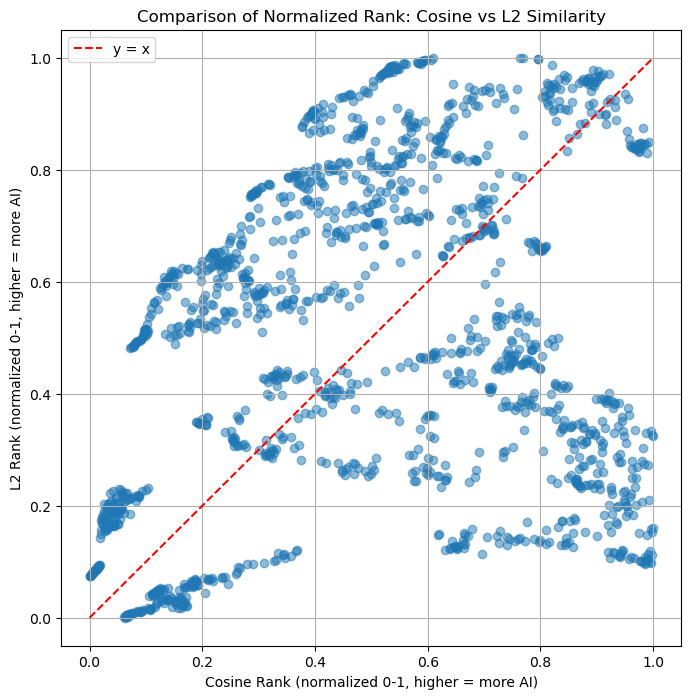

In [6]:
n = len(df)

# Rank L2 (smaller = more AI) and Cosine (larger = more AI)
df['l2_rank'] = df['l2_similarities'].rank(method='min', ascending=True) - 1  # 0 = smallest L2
df['cos_rank'] = df['cos_similarities'].rank(method='min', ascending=True) - 1  # 0 = smallest Cosine

# Normalize to 0-1
df['l2_rank_norm'] = 1 - (df['l2_rank'] / (n - 1))  # invert L2: 1 = most AI
df['cos_rank_norm'] = df['cos_rank'] / (n - 1)      # Cosine: 1 = most AI

# Scatter plot with diagonal
plt.figure(figsize=(8,8))
plt.scatter(df['cos_rank_norm'], df['l2_rank_norm'], alpha=0.5)

# Add diagonal line
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="y = x")

plt.xlabel("Cosine Rank (normalized 0-1, higher = more AI)")
plt.ylabel("L2 Rank (normalized 0-1, higher = more AI)")
plt.title("Comparison of Normalized Rank: Cosine vs L2 Similarity")
plt.legend()
plt.grid(True)
plt.show()


---

## Creates a column "category_match" 

category_match gives true when L2_category and Cos_category is the same (both high, medium or low similarity)

In [7]:
# Create a column that is True if both categories match, False otherwise
df["category_match"] = df["L2_category"] == df["Cos_category"]

# Print counts for True and False
print(df["category_match"].value_counts())
df.head()

category_match
True     763
False    732
Name: count, dtype: int64


,id,Name,doi,year,researcher_id,title_preferred,abstract_preferred,for_first_level,for_second_level,l2_similarities,cos_similarities,L2_category,Cos_category,l2_rank,cos_rank,l2_rank_norm,cos_rank_norm,category_match
0,pub.1144121389,Yao Yu,10.1002/essoar.10508279.2,2021.0,ur.012443735304.38,Improved Bathymetric Prediction using Geologic...,None,None,None,10.109487,0.998029,Medium similarity,High similarity,913.0,1165.0,0.388889,0.779786,False
1,pub.1170962708,Md Abdul Halim,10.1016/j.scitotenv.2024.172666,2024.0,ur.012551357145.32,"Large, sustained soil CO2 efflux but rapid rec...","The net effect of forest disturbances, such as...","[{'id': '80001', 'code': '30', 'name': 'Agricu...","[{'id': '80030', 'code': '3007', 'name': 'Fore...",10.706790,0.999846,Medium similarity,High similarity,982.0,1401.0,0.342704,0.937751,False
2,pub.1138897652,Kilian Stenning,10.1021/acsnano.1c02537,2021.0,ur.013743527603.86,Comparison of Spin-Wave Modes in Connected and...,Artificial spin ice systems have seen burgeoni...,"[{'id': '80022', 'code': '51', 'name': 'Physic...","[{'id': '80222', 'code': '5103', 'name': 'Clas...",3.862418,0.999325,High similarity,High similarity,80.0,1280.0,0.946452,0.856760,True
3,pub.1187545853,Felipe Siqueira Pacheco,10.1609/aaai.v39i27.35019,2025.0,ur.012044451635.21,Constraint-aware Pareto Optimization for Tree-...,Addressing global sustainability challenges as...,"[{'id': '80019', 'code': '48', 'name': 'Law an...","[{'id': '80201', 'code': '4802', 'name': 'Envi...",10.879473,0.979394,Medium similarity,Medium similarity,1030.0,409.0,0.310576,0.273762,True
4,pub.1187545853,Sebastian Heilpern,10.1609/aaai.v39i27.35019,2025.0,ur.012541317137.51,Constraint-aware Pareto Optimization for Tree-...,Addressing global sustainability challenges as...,"[{'id': '80019', 'code': '48', 'name': 'Law an...","[{'id': '80201', 'code': '4802', 'name': 'Envi...",10.885564,0.978769,Medium similarity,Medium similarity,1032.0,404.0,0.309237,0.270415,True


In [8]:
# Prints the counts of True and False of the category_match column
true_count = df["category_match"].sum()
false_count = (~df["category_match"]).sum()

print("Count of True:", true_count)
print("Count of false False:", false_count)

Count of True: 763
Count of false False: 732


---

## Creates a column "name_category" based on first_level_clean

This column categorizes entries into broader AI-related fields based on the "first_level_clean" column. 
We first extracted unique names values from "first_level_clean" and then grouped them together into to compare name categories. 
Through this, we can analyze how AI metrics vary across different AI-related fields. 

In [9]:
import numpy as np

def extract_first_level_name(x):
    # Case 1: numpy array → convert to list
    if isinstance(x, np.ndarray):
        x = x.tolist()
    
    # Case 2: list of dicts
    if isinstance(x, list) and len(x) > 0 and isinstance(x[0], dict):
        return x[0].get("name")
    
    return None

df["name_category"] = df["for_first_level"].apply(extract_first_level_name)

print(df.groupby("name_category")["l2_similarities"].describe())

                                            count       mean       std  \
name_category                                                            
Agricultural, Veterinary and Food Sciences   35.0  11.273127  1.219652   
Biological Sciences                         270.0  10.096942  2.753057   
Biomedical and Clinical Sciences            178.0   9.530402  2.410104   
Built Environment and Design                 23.0   9.155439  2.457912   
Chemical Sciences                           264.0   4.971606  1.812604   
Commerce, Management, Tourism and Services   17.0  11.130345  0.634266   
Earth Sciences                               48.0  10.656020  0.544615   
Economics                                     5.0  10.426831  1.492828   
Education                                     1.0  11.444616       NaN   
Engineering                                 243.0   8.376773  2.210832   
Environmental Sciences                       25.0  11.306902  0.665236   
Health Sciences                       

In [10]:
print(df.groupby("name_category")["cos_similarities"].describe())

                                            count      mean       std  \
name_category                                                           
Agricultural, Veterinary and Food Sciences   35.0  0.997332  0.006426   
Biological Sciences                         270.0  0.984677  0.022359   
Biomedical and Clinical Sciences            178.0  0.959434  0.032387   
Built Environment and Design                 23.0  0.988703  0.005080   
Chemical Sciences                           264.0  0.990523  0.005070   
Commerce, Management, Tourism and Services   17.0  0.980396  0.011889   
Earth Sciences                               48.0  0.997504  0.004079   
Economics                                     5.0  0.981775  0.003916   
Education                                     1.0  0.993416       NaN   
Engineering                                 243.0  0.992727  0.007413   
Environmental Sciences                       25.0  0.991353  0.018311   
Health Sciences                              28.0  

In [51]:
total_name_category = len(df["name_category"].value_counts(dropna=False))
print("The total number of categories are",total_name_category)

The total number of categories are 20


## <span style ="color:yellow">New Updates</span>

# Average AI-ness by Research Field

We calculate the **average similarity (AI-ness)** for each research field (based on `name_category`).  
Two metrics are shown: **L2 similarity** and **Cosine similarity**.  
- **X-axis:** Research fields (`name_category`)  
- **Y-axis:** Average similarity (AI-ness)  
- Bars are annotated with the mean similarity for easy comparison.


In [11]:
# Count occurrences of each category including None
# A total of 20 unique categories including None
df["name_category"].value_counts(dropna=False)

name_category
Biological Sciences                           270
Chemical Sciences                             264
Engineering                                   243
Physical Sciences                             196
Biomedical and Clinical Sciences              178
Information and Computing Sciences             96
Earth Sciences                                 48
Agricultural, Veterinary and Food Sciences     35
None                                           32
Health Sciences                                28
Environmental Sciences                         25
Built Environment and Design                   23
Commerce, Management, Tourism and Services     17
Mathematical Sciences                          14
Human Society                                   9
Psychology                                      6
Economics                                       5
Language, Communication and Culture             3
Law and Legal Studies                           2
Education                           

/tmp/ipykernel_1021031/2113535524.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(mean_l2.index, rotation=90)
/tmp/ipykernel_1021031/2113535524.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(mean_cos.index, rotation=90)


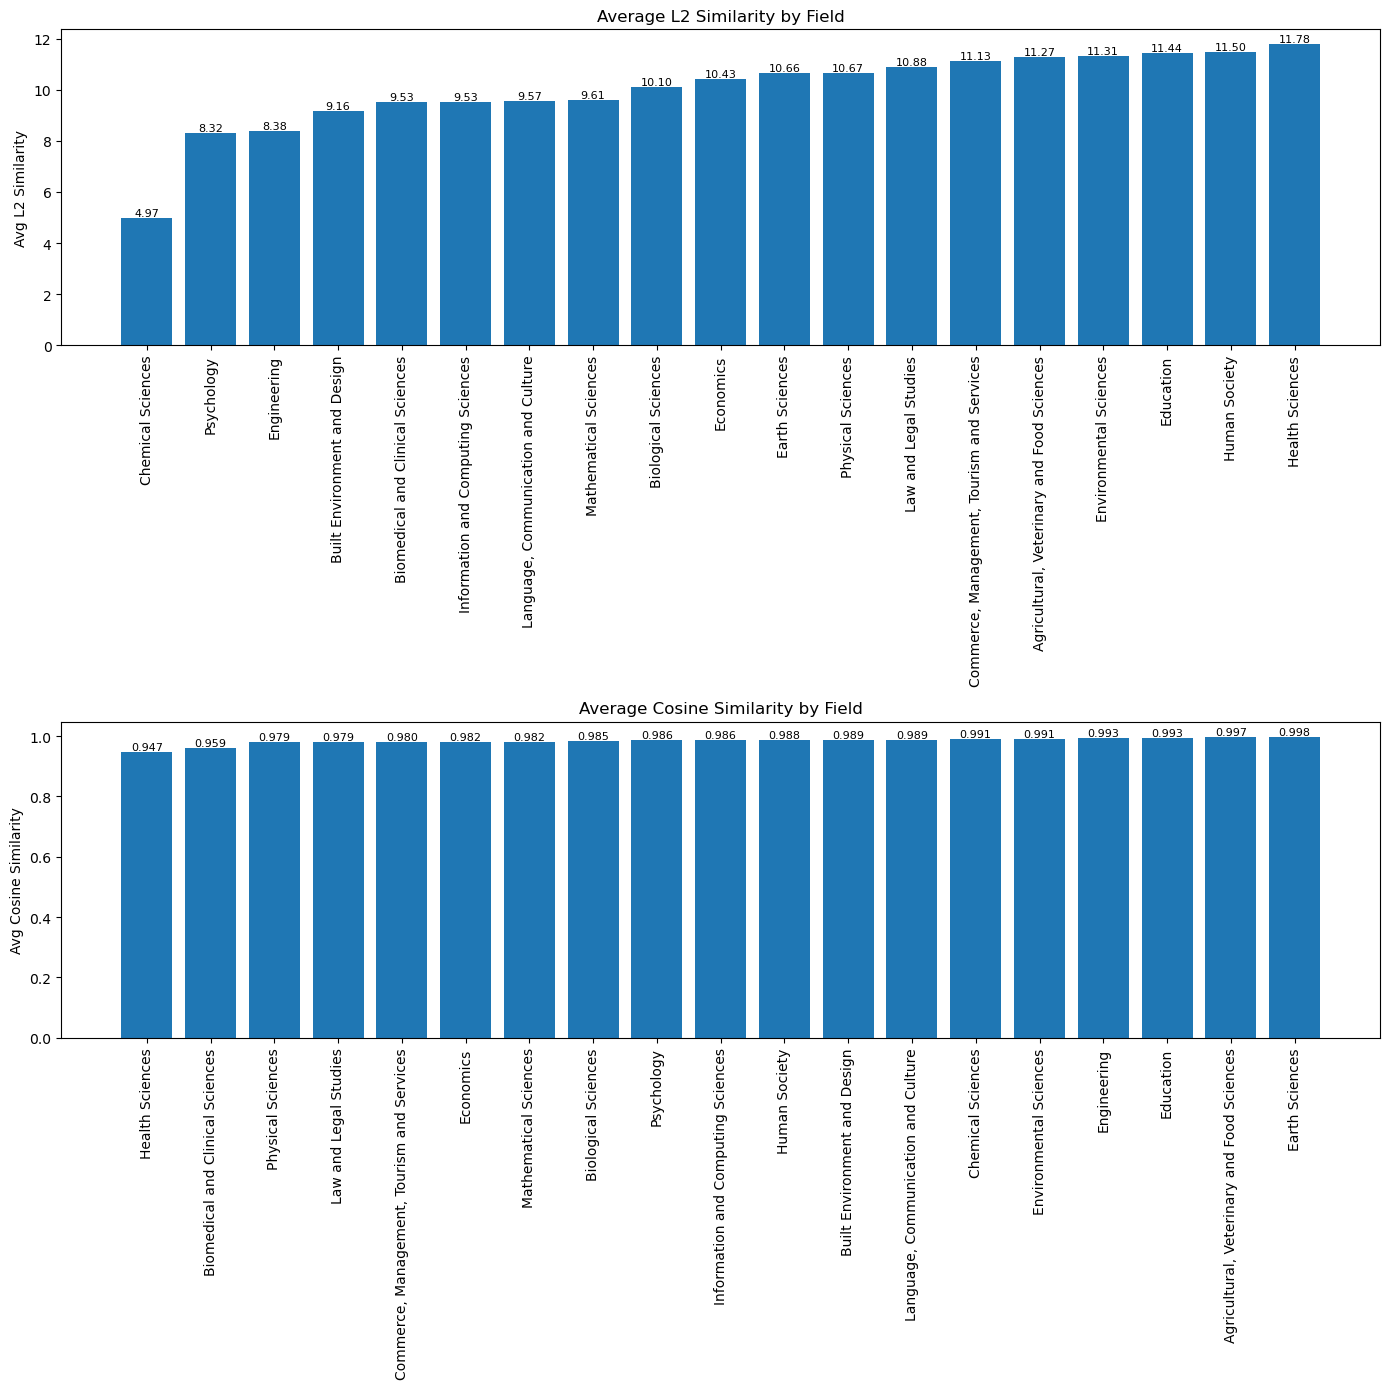

In [12]:
# Compute averages
mean_l2 = df.groupby("name_category")["l2_similarities"].mean().sort_values()
mean_cos = df.groupby("name_category")["cos_similarities"].mean().sort_values()

# Create vertical layout (2 rows, 1 column)
fig, axes = plt.subplots(2, 1, figsize=(14, 14))

# ---------------------------
# Plot 1: L2 similarity
# ---------------------------
bars_l2 = axes[0].bar(mean_l2.index, mean_l2.values)

axes[0].set_title("Average L2 Similarity by Field")
axes[0].set_ylabel("Avg L2 Similarity")
axes[0].set_xticklabels(mean_l2.index, rotation=90)

# Add labels above bars
for bar in bars_l2:
    height = bar.get_height()
    axes[0].text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=8
    )

# ---------------------------
# Plot 2: Cosine similarity
# ---------------------------
bars_cos = axes[1].bar(mean_cos.index, mean_cos.values)

axes[1].set_title("Average Cosine Similarity by Field")
axes[1].set_ylabel("Avg Cosine Similarity")
axes[1].set_xticklabels(mean_cos.index, rotation=90)

# Add labels above bars
for bar in bars_cos:
    height = bar.get_height()
    axes[1].text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{height:.3f}",
        ha="center",
        va="bottom",
        fontsize=8
    )

plt.tight_layout()
plt.show()



### Abstract Availability by Research Field

To understand whether missing abstracts affect similarity metrics, we first examine how many papers have and do not have abstracts within each research field (name_category). This helps identify whether missing abstracts are concentrated in specific disciplines.

Out of the 19 name_cateogry there are 7 with missing abstract_preferred. The following name_category have missing abstract:
- Agricultural, Veterinary and Food Sciences	
- Biological Sciences	
- Biomedical and Clinical Sciences
- Chemical Sciences
- Health Sciences
- Mathematical Sciences
- Physical Sciences 


In [13]:
# Create a boolean column indicating whether abstract exists
df["has_abstract"] = df["abstract_preferred"].notna()

# Group by category + abstract status
abstract_stats = (
    df.groupby(["name_category", "has_abstract"])
      .size()
      .unstack(fill_value=0)
      .rename(columns={True: "has_abstract", False: "no_abstract"})
)
abstract_stats["total"] = abstract_stats.sum(axis=1)
abstract_stats["pct_missing"] = (abstract_stats["no_abstract"] / abstract_stats["total"]) * 100

abstract_stats

has_abstract,no_abstract,has_abstract,total,pct_missing
name_category,,,,
"Agricultural, Veterinary and Food Sciences",2,33,35,5.714286
Biological Sciences,24,246,270,8.888889
Biomedical and Clinical Sciences,22,156,178,12.359551
Built Environment and Design,0,23,23,0.000000
Chemical Sciences,3,261,264,1.136364
"Commerce, Management, Tourism and Services",0,17,17,0.000000
Earth Sciences,0,48,48,0.000000
Economics,0,5,5,0.000000
Education,0,1,1,0.000000


---

## Comparing similarity distributions based on the presence of first-level category

The following codes first check for missing first-level categories and then provide descriptive statistics for similarity metrics based on whether the category is present or missing.

**Result**: 
- L2 similarity (missing category) > L2 similarity (category present)
- Cosine similarity (missing category) > Cosine similarity (category present)

In [14]:
# Check rows where the first-level category is missing
missing_category = df["name_category"].isna()
print("Number of papers with missing first-level category:", missing_category.sum())

# Descriptive stats for similarity metrics when category is missing
print("\n=== L2 similarity (missing category) ===")
print(df.loc[missing_category, "l2_similarities"].describe())

print("\n=== Cosine similarity (missing category) ===")
print(df.loc[missing_category, "cos_similarities"].describe())

Number of papers with missing first-level category: 32

=== L2 similarity (missing category) ===
count    32.000000
mean      9.431499
std       2.952606
min       3.196423
25%       8.655492
50%       9.817151
75%      11.514370
max      13.827126
Name: l2_similarities, dtype: float64

=== Cosine similarity (missing category) ===
count    32.000000
mean      0.985660
std       0.029391
min       0.880975
25%       0.988817
50%       0.996064
75%       0.998117
max       0.999853
Name: cos_similarities, dtype: float64


In [15]:
# Descriptive stats for similarity metrics when category is present
print("\n=== L2 similarity (category present) ===")
print(df.loc[~missing_category, "l2_similarities"].describe())

print("\n=== Cosine similarity (category present) ===")
print(df.loc[~missing_category, "cos_similarities"].describe())


=== L2 similarity (category present) ===
count    1463.000000
mean        8.952871
std         3.444678
min         3.149093
25%         5.788970
50%         8.865207
75%        11.501585
max        16.038294
Name: l2_similarities, dtype: float64

=== Cosine similarity (category present) ===
count    1463.000000
mean        0.983440
std         0.021135
min         0.872084
25%         0.976455
50%         0.989628
75%         0.997622
max         1.000000
Name: cos_similarities, dtype: float64


---

## Exploring abstract_preferred column

Exploratory code to check for missing values in the 'abstract_preferred' column and analyze similarity metrics accordingly.

**Result**:
- 90 papers have missing abstract_preferred
- 1405 papers have abstract_preferred present
- missing abstract_preferred > present abstract_preferred

In general, papers with missing abstract_preferred tend to have slightly higher L2 similarities and cosine similarities compared to those with present abstract_preferred. This suggests that papers without an abstract_preferred might be more closely related to the AI field based on the similarity metrics. 
However, the differences are not very large, indicating that missing abstract_preferred does not drastically affect the similarity measures.

In [16]:
# Filter rows where the abstract_preferred is None
missing_abstract_df = df[df["abstract_preferred"].isna()]

# Specify the output path
output_path = "/share/yin/nz268/missing_category_papers.csv"

# Save to CSV
missing_abstract_df.to_csv(output_path, index=False)
print(f"✅ CSV saved for papers with missing abstract_preferred at:\n{output_path}")

missing_abstract_df.head()

✅ CSV saved for papers with missing abstract_preferred at:
/share/yin/nz268/missing_category_papers.csv


,id,Name,doi,year,researcher_id,title_preferred,abstract_preferred,for_first_level,for_second_level,l2_similarities,cos_similarities,L2_category,Cos_category,l2_rank,cos_rank,l2_rank_norm,cos_rank_norm,category_match,name_category,has_abstract
0,pub.1144121389,Yao Yu,10.1002/essoar.10508279.2,2021.0,ur.012443735304.38,Improved Bathymetric Prediction using Geologic...,None,None,None,10.109487,0.998029,Medium similarity,High similarity,913.0,1165.0,0.388889,0.779786,False,None,False
21,pub.1143323118,Yu Zhou,10.1002/essoar.10506768.1,2021.0,ur.0607065617.77,A modified Vegetation Photosynthesis and Respi...,None,"[{'id': '80002', 'code': '31', 'name': 'Biolog...","[{'id': '80041', 'code': '3108', 'name': 'Plan...",10.863489,0.999550,Medium similarity,High similarity,1026.0,1316.0,0.313253,0.880857,False,Biological Sciences,False
56,pub.1123793146,Caitlin Aamodt,10.1126/science.aba6129,2020.0,ur.012372367557.93,Making science accessible,None,None,None,11.554433,0.993024,Low similarity,High similarity,1130.0,865.0,0.243641,0.578983,False,None,False
86,pub.1148232633,Benjamin Moss,10.29363/nanoge.hopv.2022.028,2022.0,ur.013160335027.48,Operando-photoluminescence spectroscopy for ac...,None,"[{'id': '80005', 'code': '34', 'name': 'Chemic...","[{'id': '80070', 'code': '3406', 'name': 'Phys...",3.303551,0.993339,High similarity,High similarity,9.0,884.0,0.993976,0.591700,True,Chemical Sciences,False
119,pub.1185608799,Kristofer Linton-Reed,10.1016/j.ijgc.2024.100216,2025.0,ur.010426525447.07,Clinical Utility Of Ultrasonography In Pediatr...,None,"[{'id': '80003', 'code': '32', 'name': 'Biomed...","[{'id': '80058', 'code': '3215', 'name': 'Repr...",9.047504,0.950714,Medium similarity,Low similarity,772.0,110.0,0.483266,0.073628,False,Biomedical and Clinical Sciences,False


In [17]:
# Check statistics of the missing abstract papers
print("=== L2 Similarity Stats ===")
print(missing_abstract_df["l2_similarities"].describe())
print()

print("=== Cosine Similarity Stats ===")
print(missing_abstract_df["cos_similarities"].describe())
print()

=== L2 Similarity Stats ===
count    90.000000
mean      8.470317
std       3.001256
min       3.196423
25%       6.037333
50%       8.443963
75%      10.623405
max      14.301450
Name: l2_similarities, dtype: float64

=== Cosine Similarity Stats ===
count    90.000000
mean      0.982552
std       0.022953
min       0.880975
25%       0.976363
50%       0.989381
75%       0.997978
max       1.000000
Name: cos_similarities, dtype: float64



In [18]:
abstract_preferred_df = df[df["abstract_preferred"].notna()]

# Statistics for papers with category present
print("=== L2 Similarity Stats (Category Present) ===")
print(abstract_preferred_df["l2_similarities"].describe())
print("\n=== Cosine Similarity Stats (Category Present) ===")
print(abstract_preferred_df["cos_similarities"].describe())

=== L2 Similarity Stats (Category Present) ===
count    1405.000000
mean        8.994682
std         3.459196
min         3.149093
25%         5.790668
50%         8.966554
75%        11.532019
max        16.038294
Name: l2_similarities, dtype: float64

=== Cosine Similarity Stats (Category Present) ===
count    1405.000000
mean        0.983548
std         0.021234
min         0.872084
25%         0.976797
50%         0.989830
75%         0.997620
max         1.000000
Name: cos_similarities, dtype: float64


## <span style="color:yellow">New Updates</span>

### Random Sampling Analysis by Field

- Group papers by the same field.
- Separate papers into two groups: 
  - With abstract
  - Without abstract
- Compare the same number of samples by **randomly sampling** from the larger group if one category has more samples than the other.


In [19]:
# Creates a comparison_df DataFrame comparing similarity metrics
# Ensure reproducibility
np.random.seed(42)

# Columns we want to compare
similarity_cols = ["l2_similarities", "cos_similarities"]

# Prepare an empty list to store comparison results
comparison_results = []

# Loop over each field
for field, group in df.groupby("name_category"):

    # Skip fields with no data
    if group.shape[0] == 0:
        continue

    # Split by abstract presence
    has_abs = group[group["has_abstract"] == True]
    no_abs = group[group["has_abstract"] == False]

    # Skip if one group is empty
    if has_abs.empty or no_abs.empty:
        continue

    # Determine the smaller size and sample from the larger group
    min_size = min(len(has_abs), len(no_abs))
    has_abs_sample = has_abs.sample(min_size, random_state=42)
    no_abs_sample = no_abs.sample(min_size, random_state=42)

    # Calculate mean and std for both metrics
    for col in similarity_cols:
        mean_has = has_abs_sample[col].mean()
        mean_no = no_abs_sample[col].mean()
        std_has = has_abs_sample[col].std()
        std_no = no_abs_sample[col].std()

        comparison_results.append({
            "field": field,
            "metric": col,
            "mean_with_abstract": mean_has,
            "mean_without_abstract": mean_no,
            "std_with_abstract": std_has,
            "std_without_abstract": std_no,
            "n_samples": min_size
        })

# Convert to DataFrame
comparison_df = pd.DataFrame(comparison_results)
comparison_df.head()

,field,metric,mean_with_abstract,mean_without_abstract,std_with_abstract,std_without_abstract,n_samples
0,"Agricultural, Veterinary and Food Sciences",l2_similarities,12.071198,10.809447,1.359581,2.822827e-03,2
1,"Agricultural, Veterinary and Food Sciences",cos_similarities,0.997658,1.000000,0.003080,4.655272e-07,2
2,Biological Sciences,l2_similarities,9.497368,7.489677,2.298865,2.872029e+00,24
3,Biological Sciences,cos_similarities,0.979437,0.990792,0.016367,1.024537e-02,24
4,Biomedical and Clinical Sciences,l2_similarities,9.504183,9.041606,2.852678,2.017163e+00,22


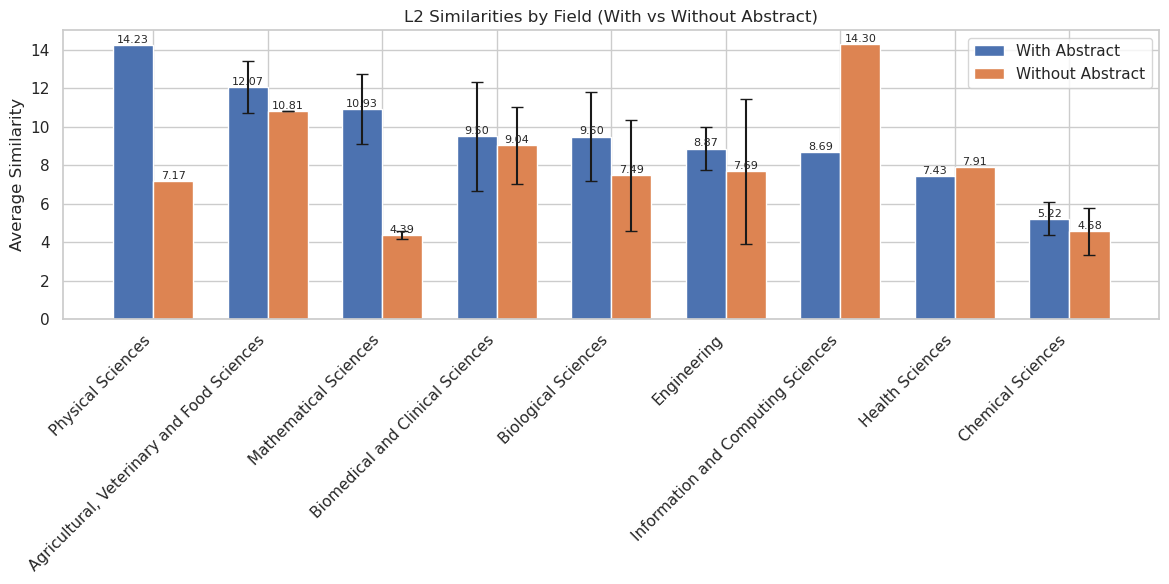

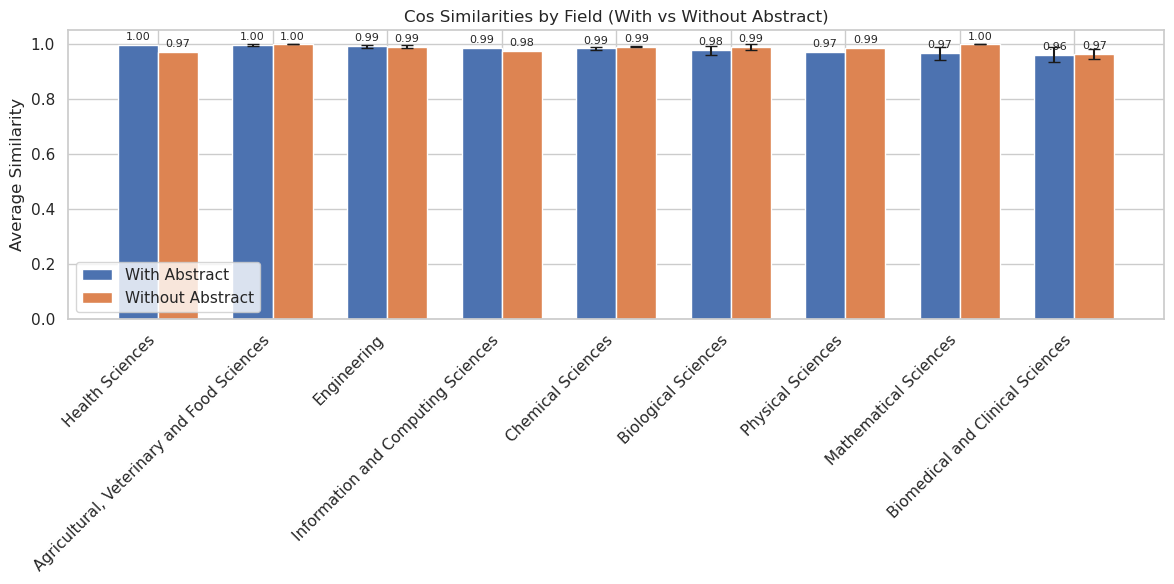

In [20]:
# Create bar plots comparing the two groups for each metric including error bars
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
metrics = ["l2_similarities", "cos_similarities"]

for metric in metrics:
    data = comparison_df[comparison_df["metric"] == metric].sort_values("mean_with_abstract", ascending=False)
    
    plt.figure(figsize=(12,6))
    x = range(len(data))
    width = 0.35
    
    plt.bar(x, data["mean_with_abstract"], width=width, label="With Abstract", yerr=data["std_with_abstract"], capsize=4)
    plt.bar([i + width for i in x], data["mean_without_abstract"], width=width, label="Without Abstract", yerr=data["std_without_abstract"], capsize=4)
    
    plt.xticks([i + width/2 for i in x], data["field"], rotation=45, ha="right")
    plt.ylabel("Average Similarity")
    plt.title(f"{metric.replace('_',' ').title()} by Field (With vs Without Abstract)")
    plt.legend()
    plt.tight_layout()
    
    # Annotate bars
    for i, val in enumerate(data["mean_with_abstract"]):
        plt.text(i, val + 0.01, f"{val:.2f}", ha="center", va="bottom", fontsize=8)
    for i, val in enumerate(data["mean_without_abstract"]):
        plt.text(i + width, val + 0.01, f"{val:.2f}", ha="center", va="bottom", fontsize=8)
    
    plt.show()


The bars without error bars is due to having a single value therefore the standard deviation is zero. In the L2 graph, the following (`name_category`)  have more variability in the mean due to the longer error bar:
- Biomedical and Clinical Sciences
- Biological Sciences 
- Engineering 

On the other hand, since Cos Similarities' numbers are really close, decimal point differences, there are less varaibility in the mean.

## December 2nd Updates:
- Redo graph above for different categories, don't do random smapling becasue without_abstract count is small

In [62]:
comparison_results = []

for field, group in df.groupby("name_category"):
    has_abs = group[group["has_abstract"] == True]
    no_abs = group[group["has_abstract"] == False]

    # Skip if one group is empty
    if has_abs.empty or no_abs.empty:
        continue

    for col in similarity_cols:
        comparison_results.append({
            "field": field,
            "metric": col,
            "mean_with_abstract": has_abs[col].mean(),
            "mean_without_abstract": no_abs[col].mean(),
            "std_with_abstract": has_abs[col].std(),
            "std_without_abstract": no_abs[col].std(),
            "n_samples_with": len(has_abs),
            "n_samples_without": len(no_abs)
        })

comparison_df_no_sample = pd.DataFrame(comparison_results)

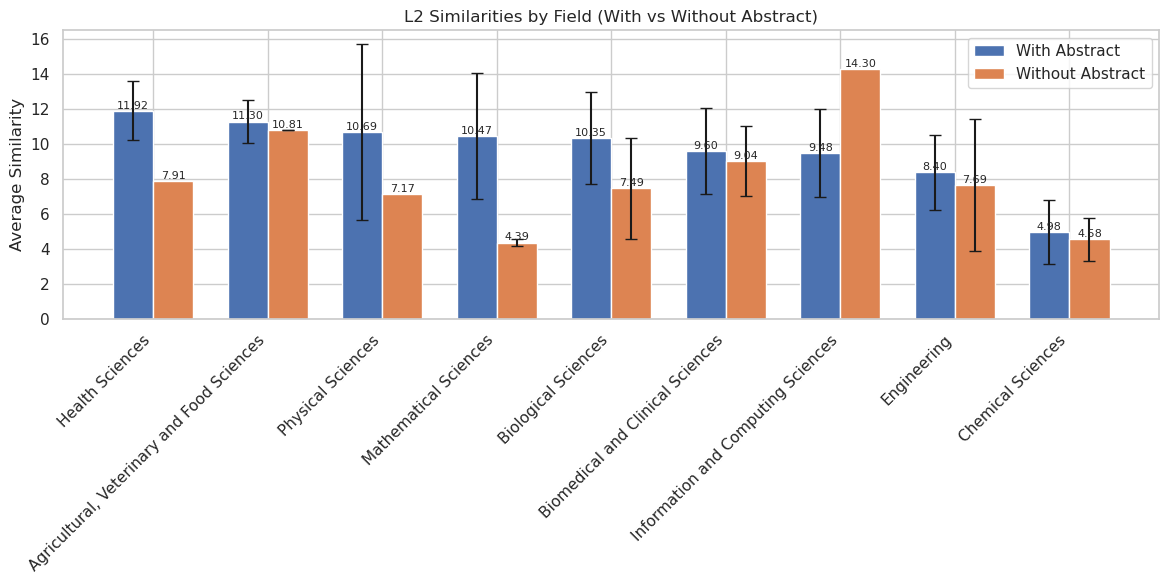

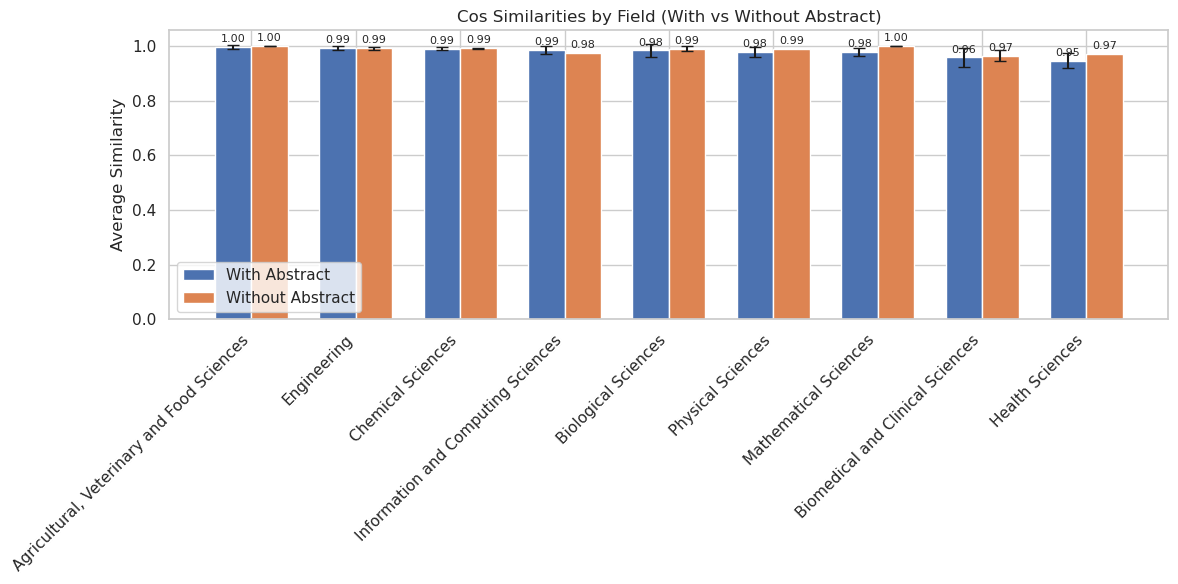

In [22]:
sns.set(style="whitegrid")
metrics = ["l2_similarities", "cos_similarities"]

for metric in metrics:
    # Filter the data for this metric
    data = comparison_df_no_sample[comparison_df_no_sample["metric"] == metric].sort_values("mean_with_abstract", ascending=False)
    
    plt.figure(figsize=(12,6))
    x = range(len(data))
    width = 0.35
    
    # Plot bars with error bars
    plt.bar(x, data["mean_with_abstract"], width=width, 
            yerr=data["std_with_abstract"], capsize=4, label="With Abstract")
    plt.bar([i + width for i in x], data["mean_without_abstract"], width=width, 
            yerr=data["std_without_abstract"], capsize=4, label="Without Abstract")
    
    # X-axis labels
    plt.xticks([i + width/2 for i in x], data["field"], rotation=45, ha="right")
    plt.ylabel("Average Similarity")
    plt.title(f"{metric.replace('_',' ').title()} by Field (With vs Without Abstract)")
    plt.legend()
    plt.tight_layout()
    
    # Annotate bars with values
    for i, val in enumerate(data["mean_with_abstract"]):
        plt.text(i, val + 0.01, f"{val:.2f}", ha="center", va="bottom", fontsize=8)
    for i, val in enumerate(data["mean_without_abstract"]):
        plt.text(i + width, val + 0.01, f"{val:.2f}", ha="center", va="bottom", fontsize=8)
    
    plt.show()


---

## Compares metric with and without abstract category 

Create two boxplots to compare the distribution of similarity metrics for papers with and without the abstract_preferred field.

In [23]:
df["has_abstract"] = df["abstract_preferred"].notna()
grouped = df.groupby("has_abstract")[["l2_similarities", "cos_similarities"]]
print(grouped.describe())

             l2_similarities                                          \
                       count      mean       std       min       25%   
has_abstract                                                           
False                   90.0  8.470317  3.001256  3.196423  6.037333   
True                  1405.0  8.994682  3.459196  3.149093  5.790668   

                                             cos_similarities            \
                   50%        75%        max            count      mean   
has_abstract                                                              
False         8.443963  10.623405  14.301450             90.0  0.982552   
True          8.966554  11.532019  16.038294           1405.0  0.983548   

                                                                     
                   std       min       25%       50%       75%  max  
has_abstract                                                         
False         0.022953  0.880975  0.976363  0.989381 

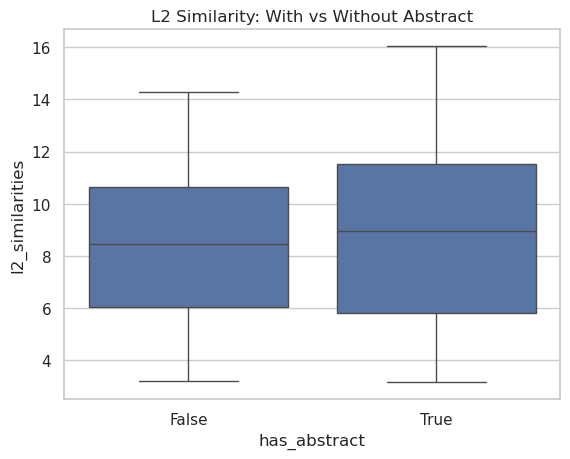

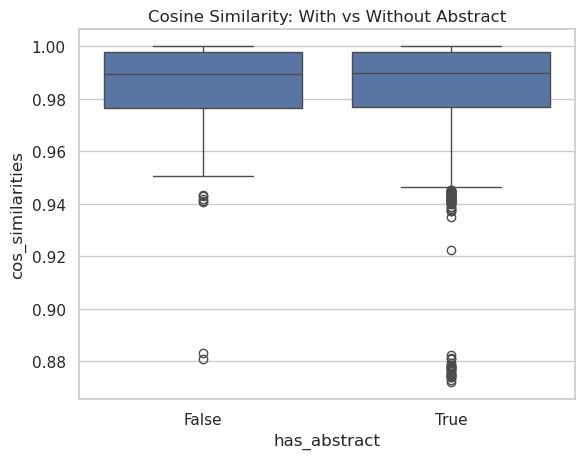

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="has_abstract", y="l2_similarities", data=df)
plt.title("L2 Similarity: With vs Without Abstract")
plt.show()

sns.boxplot(x="has_abstract", y="cos_similarities", data=df)
plt.title("Cosine Similarity: With vs Without Abstract")
plt.show()

In [25]:
# Crosstab analysis to check if missing abstracts are more likely to be classified as Low / Medium / High similarity
pd.crosstab(df["has_abstract"], df["L2_category"])
pd.crosstab(df["has_abstract"], df["Cos_category"])

Cos_category,High similarity,Low similarity,Medium similarity
has_abstract,,,
False,44,18,28
True,699,246,460


#### T-test to compare means of similarity metrics between papers with and without abstracts

- Results show no significant difference in distribution of similarity categories based on abstract presence for L2 similarities since the p-values are high (> 0.05) in the t-test
- For both L2 and Cosine similarities, the mean and standard deviation are very similar between papers with abstracts and without abstracts.The t-tests show p-values > 0.05, meaning the differences are not statistically significant.

**✅ Result**: Missing abstracts do not substantially impact either similarity metric. The embedding + similarity approach is robust even when abstracts are missing.

In [26]:
from scipy.stats import ttest_ind

l2_with = df[df["has_abstract"]]["l2_similarities"]
l2_without = df[~df["has_abstract"]]["l2_similarities"]
ttest_ind(l2_with, l2_without, nan_policy="omit")

TtestResult(statistic=1.4045009121594538, pvalue=0.16037774001416455, df=1493.0)

In [27]:
# Split by abstract availability
cos_with = df[df["has_abstract"]]["cos_similarities"]
cos_without = df[~df["has_abstract"]]["cos_similarities"]

# Perform t-test
cos_ttest = ttest_ind(cos_with, cos_without, nan_policy="omit")

print(cos_ttest)

TtestResult(statistic=0.4290082690272202, pvalue=0.6679791008284497, df=1493.0)


---

## Trend of L2 Similarity over the Years

The following code produces graphs to show the trend of Ai-ness over the years for the two different metric.

**Note:** Since Lower L2 → closer to AI we inverted because usually people expect higher values = more AI-like.

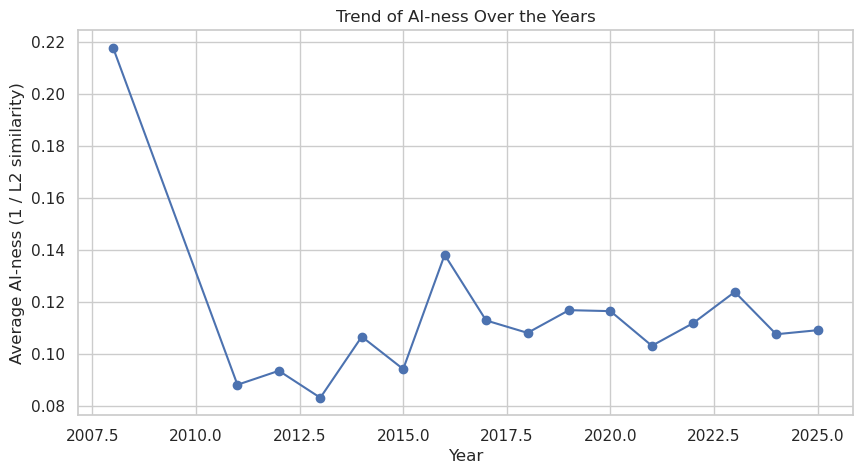

In [28]:
# Group by year and calculate mean L2 similarity
yearly_l2 = df.groupby("year")["l2_similarities"].mean().reset_index()
yearly_l2["avg_AI_score"] = 1 / yearly_l2["l2_similarities"]  # optional: invert to make higher = more AI

# Plot
plt.figure(figsize=(10,5))
plt.plot(yearly_l2["year"], yearly_l2["avg_AI_score"], marker='o')
plt.xlabel("Year")
plt.ylabel("Average AI-ness (1 / L2 similarity)")
plt.title("Trend of AI-ness Over the Years")
plt.grid(True)
plt.show()


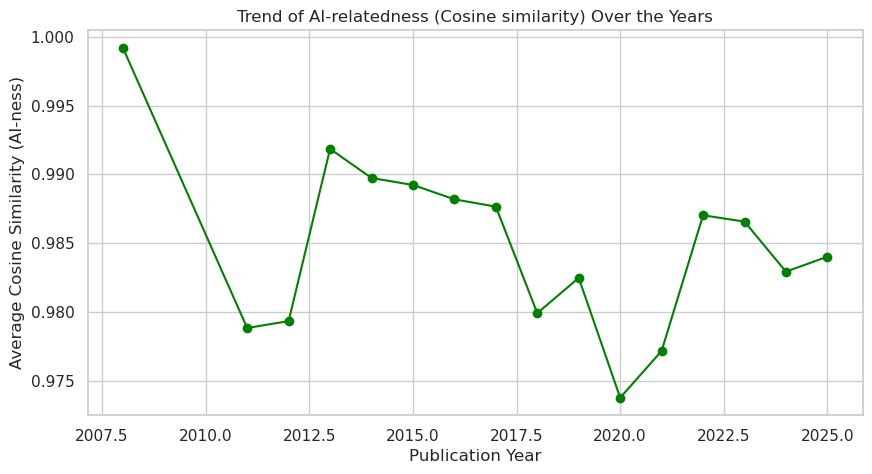

In [29]:
# Group by year and calculate mean Cosine similarity
yearly_cos = df.groupby("year")["cos_similarities"].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(yearly_cos["year"], yearly_cos["cos_similarities"], marker='o', color='green')
plt.xlabel("Publication Year")
plt.ylabel("Average Cosine Similarity (AI-ness)")
plt.title("Trend of AI-relatedness (Cosine similarity) Over the Years")
plt.grid(True)
plt.show()

## <span style="color:yellow">New Updates</span>

### Trend of AI-ness Over the Years with SEM

We visualize the trend of AI-ness (1 / L2 similarity) over time.

- **Error bars** represent the **Standard Error of the Mean (SEM)**:  
  - SD/root(n)
  - Large error bars indicate years with large variability, so the mean AI-ness estimate is less reliable.
- By inverting L2 similarity (`1 / L2 similarity`), higher values correspond to more "AI-like" papers.
- This plot allows us to see temporal trends and understand variability across years.

**RESULT:** There are no error bars around 2007 which means that there is only one paper from this time which makes this sample small for the early 2000s. 

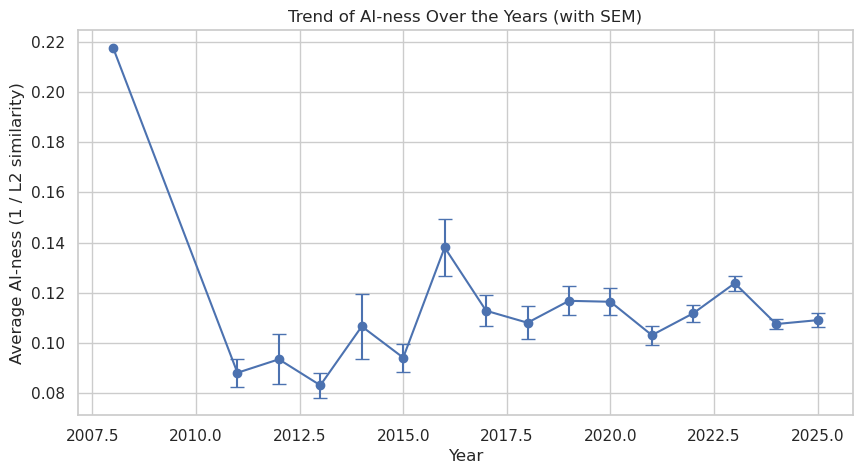

In [30]:
# Group by year and calculate mean and SEM
year_group = df.groupby("year")["l2_similarities"]
year_mean = year_group.mean()
year_sem = year_group.std() / np.sqrt(year_group.count())

# Optional: invert to make higher = more AI
year_mean_inverted = 1 / year_mean
year_sem_inverted = year_sem / (year_mean**2)  # propagate error through 1/x

# Plot with error bars
plt.figure(figsize=(10,5))
plt.errorbar(year_mean.index, year_mean_inverted, yerr=year_sem_inverted, fmt='o-', capsize=5)
plt.xlabel("Year")
plt.ylabel("Average AI-ness (1 / L2 similarity)")
plt.title("Trend of AI-ness Over the Years (with SEM)")
plt.grid(True)
plt.show()

/tmp/ipykernel_1021031/2322705239.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


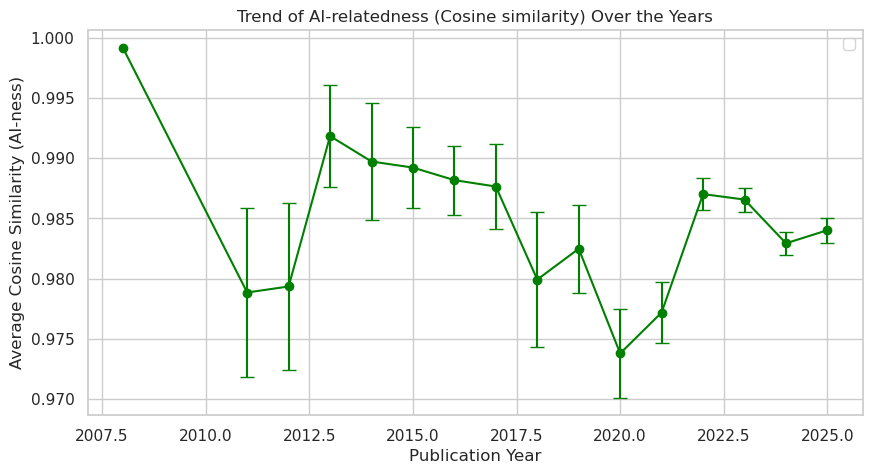

In [31]:
# Group by year
yearly_cos = df.groupby("year")["cos_similarities"].agg(['mean', 'std', 'count']).reset_index()
yearly_cos['sem'] = yearly_cos['std'] / np.sqrt(yearly_cos['count'])  # standard error of the mean

# Plot with error bars
plt.figure(figsize=(10,5))
plt.errorbar(
    yearly_cos["year"],
    yearly_cos["mean"],
    yerr=yearly_cos["sem"],
    fmt='o-',
    color='green',
    ecolor='green',
    capsize=5
)
plt.xlabel("Publication Year")
plt.ylabel("Average Cosine Similarity (AI-ness)")
plt.title("Trend of AI-relatedness (Cosine similarity) Over the Years")
plt.grid(True)
plt.legend()
plt.show()

### Trend of AI-ness for Top 5 Fields

- Here we focus on the **top 5 `name_category`** by paper count.
- The plot shows how AI-ness evolves over time within each field.
- Error bars again indicate SEM, helping assess reliability of yearly averages.
- This can highlight which fields have become more “AI-like” over the years and which are more variable.

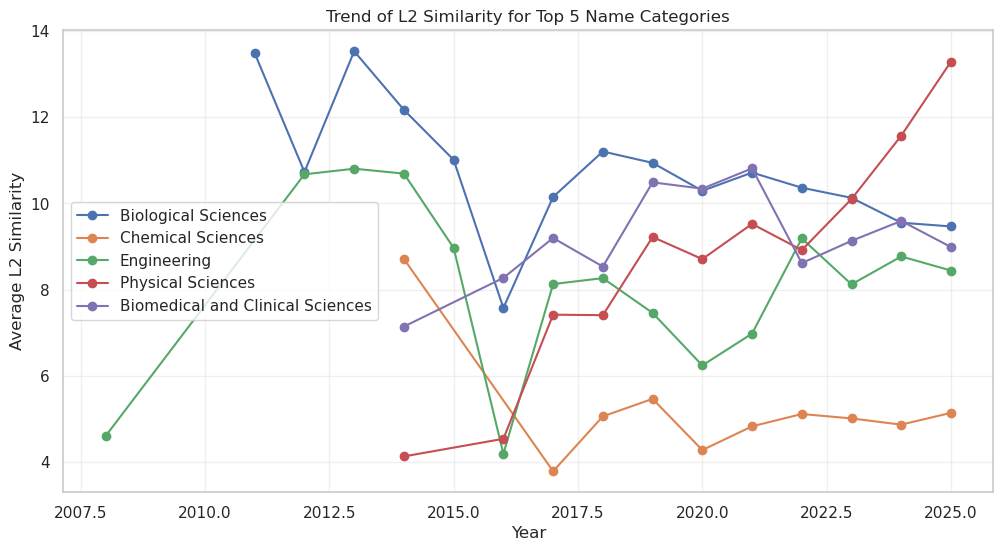

In [32]:
# Top 5 name_category trend over the years
# Count total per category to find top 5
top5_categories = df['name_category'].value_counts().head(5).index.tolist()

plt.figure(figsize=(12,6))
for cat in top5_categories:
    cat_data = df[df['name_category'] == cat].groupby('year')['l2_similarities'].mean()
    plt.plot(cat_data.index, cat_data.values, marker='o', label=cat)

plt.title("Trend of L2 Similarity for Top 5 Name Categories")
plt.xlabel("Year")
plt.ylabel("Average L2 Similarity")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## December 2nd Updates:
- make sure if you are using invereted average AI-ness or not
- INCLUDE Information and Computing Sciences (after this the sample will be small)

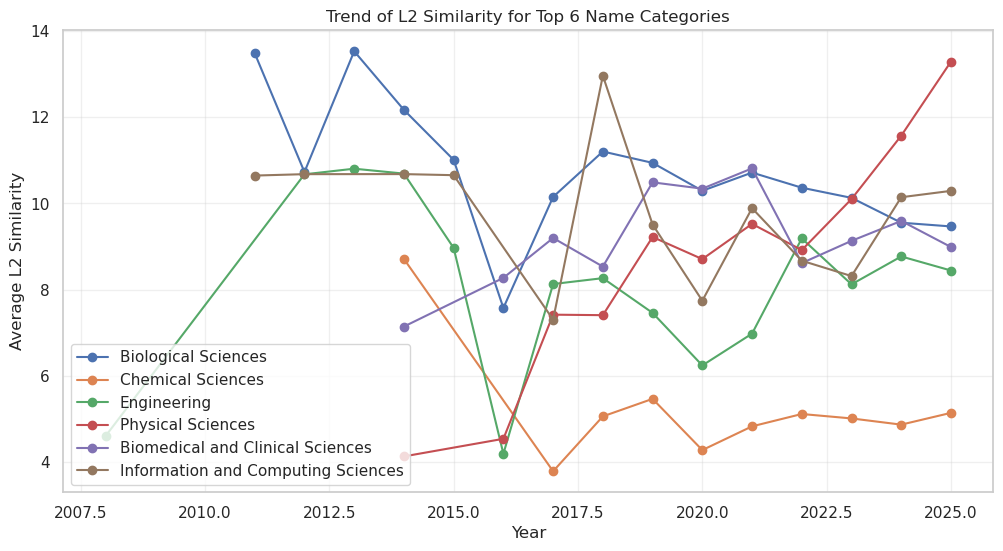

In [33]:
# Top 6 name_category trend over the years
# Count total per category to find top 6
top6_categories = df['name_category'].value_counts().head(6).index.tolist()

plt.figure(figsize=(12,6))
for cat in top6_categories:
    cat_data = df[df['name_category'] == cat].groupby('year')['l2_similarities'].mean()
    plt.plot(cat_data.index, cat_data.values, marker='o', label=cat)

plt.title("Trend of L2 Similarity for Top 6 Name Categories")
plt.xlabel("Year")
plt.ylabel("Average L2 Similarity")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

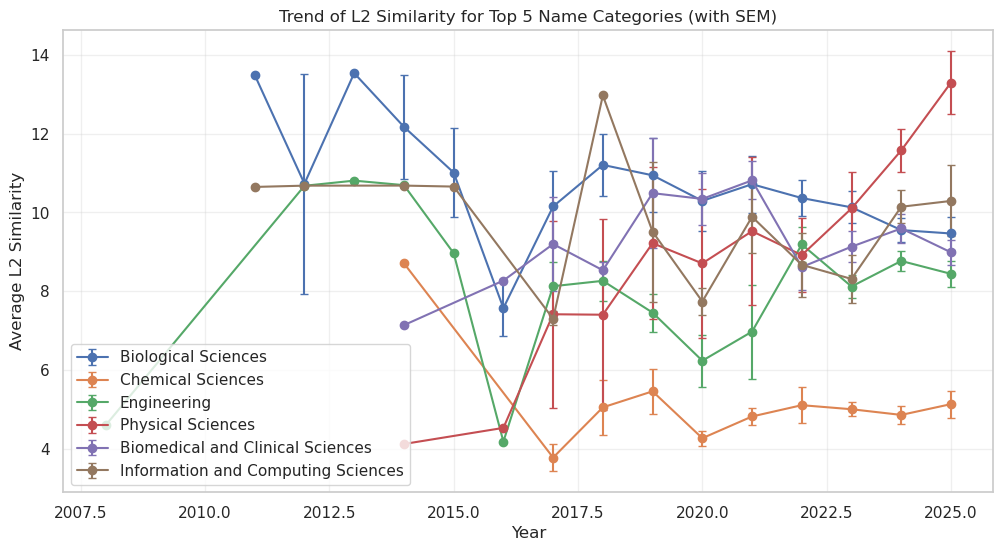

In [34]:
# Include error bars (SEM)
# Top 5 name_category by count
top6_categories = df['name_category'].value_counts().head(6).index.tolist()

plt.figure(figsize=(12,6))

for cat in top6_categories:
    cat_data = df[df['name_category'] == cat].groupby('year')['l2_similarities'].agg(['mean','std','count']).reset_index()
    cat_data['sem'] = cat_data['std'] / np.sqrt(cat_data['count'])  # SEM
    plt.errorbar(
        cat_data['year'],
        cat_data['mean'],
        yerr=cat_data['sem'],
        marker='o',
        capsize=3,
        label=cat
    )

plt.title("Trend of L2 Similarity for Top 5 Name Categories (with SEM)")
plt.xlabel("Year")
plt.ylabel("Average L2 Similarity")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### L2 Similarity Trend w/ Noise (for better visiability)

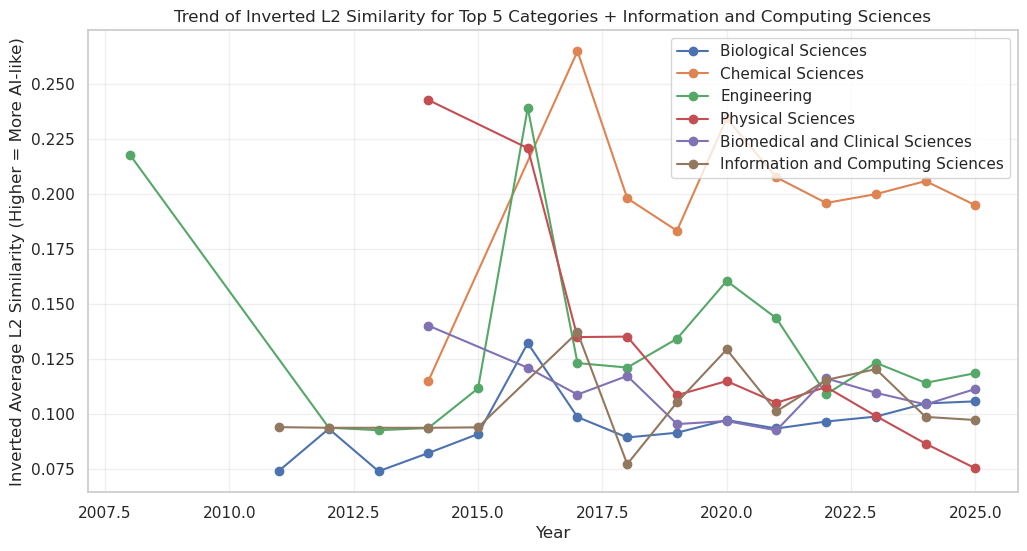

In [35]:
# Number of top categories to display
top_n = 5
extra_cat = "Information and Computing Sciences"

# Get top N categories by count
top_categories = df['name_category'].value_counts().head(top_n).index.tolist()
if extra_cat not in top_categories:
    top_categories.append(extra_cat)

plt.figure(figsize=(12,6))

# Decide whether to invert L2 (so higher = more AI-like)
invert_l2 = True
metric_to_plot = 'l2_similarities'

for cat in top_categories:
    cat_data = df[df['name_category'] == cat].groupby('year')[metric_to_plot].mean()
    
    if invert_l2:
        cat_data = 1 / (cat_data + 1e-8)  # small epsilon to avoid division by zero

    plt.plot(cat_data.index, cat_data.values, marker='o', label=cat)

plt.title(f"Trend of {'Inverted ' if invert_l2 else ''}L2 Similarity for Top {top_n} Categories + {extra_cat}")
plt.xlabel("Year")
plt.ylabel(f"{'Inverted ' if invert_l2 else ''}Average L2 Similarity (Higher = More AI-like)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


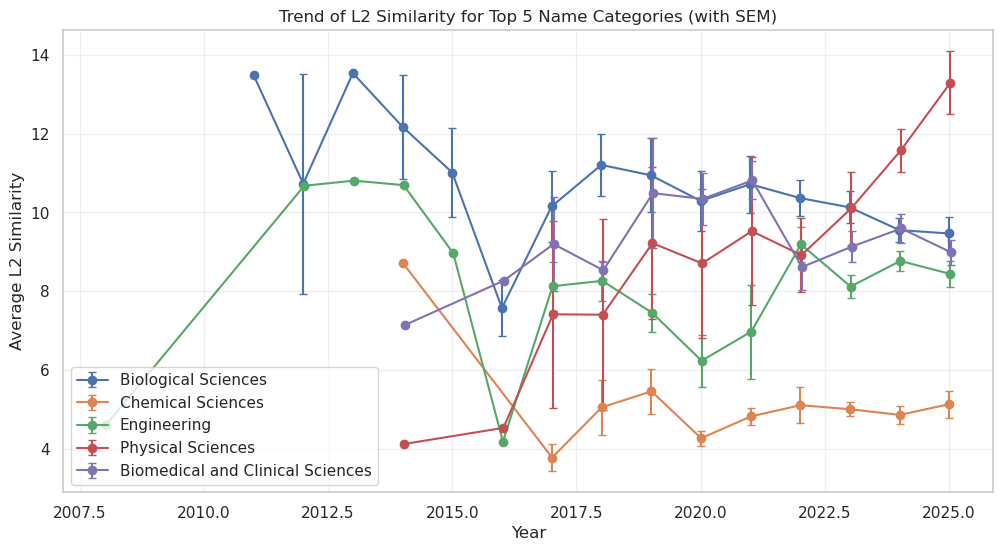

In [36]:
# Include error bars (SEM)
# Top 5 name_category by count
top5_categories = df['name_category'].value_counts().head(5).index.tolist()

plt.figure(figsize=(12,6))

for i, cat in enumerate(top5_categories):
    cat_data = df[df['name_category'] == cat].groupby('year')['l2_similarities'].agg(['mean','std','count']).reset_index()
    cat_data['sem'] = cat_data['std'] / np.sqrt(cat_data['count'])  # SEM
    plt.errorbar(
        cat_data['year'] + i*0.01,  # slight offset for visibility
        cat_data['mean'],
        yerr=cat_data['sem'],
        marker='o',
        capsize=3,
        label=cat
    )

plt.title("Trend of L2 Similarity for Top 5 Name Categories (with SEM)")
plt.xlabel("Year")
plt.ylabel("Average L2 Similarity")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


### TODO
- use new dataset to do the same thing above (finding the trend over the years)
- look at picture, for every author's paper extract the category and assign author to one category then compare
- Create slides to summarize 

---

# New Dataset: Number of AI Tool Papers 

- Name: author name
- is_using_ai_tool: the amount of cited technical AI papers

- merge the dataset above with this new dataset by Name and id 

### Number 1
- x-axis: number of AI tool papers (0, 1, 2, 3+)
- y-axis: average of Ainess (just use L2 metric) 
- also add count of each column in x-axis

### Number 2
- Heat map (scatterplot will be messy since too many points)
- x-axis: number of AI toole
- y-axis: AIness
- can make 10-20 groups to AIness 

In [37]:
# Load the parquet file
df_ai_tool = pd.read_parquet("/share/yin/kk929_codes/schmidt/intermediates/20251111_dimension_ai_tool_use.parquet")
df_ai_tool.head()  

,Name,id,num_references,is_using_ai_tool
0,Aditya Nandy,pub.1119737693,128,8.0
1,Aditya Nandy,pub.1130003451,152,5.0
2,Aditya Nandy,pub.1141537380,0,0.0
3,Aditya Nandy,pub.1145182606,0,0.0
4,Aditya Nandy,pub.1145859464,0,0.0


In [38]:
# Ensure columns to merge on exist and have same types
df["Name"] = df["Name"].astype(str)
df["id"] = df["id"].astype(str)
df_ai_tool["Name"] = df_ai_tool["Name"].astype(str)
df_ai_tool["id"] = df_ai_tool["id"].astype(str)

# Merge datasets by Name and id
df_merged = pd.merge(
    df,
    df_ai_tool[["Name", "id", "is_using_ai_tool"]],
    on=["Name", "id"],
    how="left"  # keep all rows in df even if no AI-tool info
)

print("Merged dataset shape:", df_merged.shape)
df_merged.head()

Merged dataset shape: (1495, 21)


,id,Name,doi,year,researcher_id,title_preferred,abstract_preferred,for_first_level,for_second_level,l2_similarities,...,L2_category,Cos_category,l2_rank,cos_rank,l2_rank_norm,cos_rank_norm,category_match,name_category,has_abstract,is_using_ai_tool
0,pub.1144121389,Yao Yu,10.1002/essoar.10508279.2,2021.0,ur.012443735304.38,Improved Bathymetric Prediction using Geologic...,None,None,None,10.109487,...,Medium similarity,High similarity,913.0,1165.0,0.388889,0.779786,False,None,False,0.0
1,pub.1170962708,Md Abdul Halim,10.1016/j.scitotenv.2024.172666,2024.0,ur.012551357145.32,"Large, sustained soil CO2 efflux but rapid rec...","The net effect of forest disturbances, such as...","[{'id': '80001', 'code': '30', 'name': 'Agricu...","[{'id': '80030', 'code': '3007', 'name': 'Fore...",10.706790,...,Medium similarity,High similarity,982.0,1401.0,0.342704,0.937751,False,"Agricultural, Veterinary and Food Sciences",True,0.0
2,pub.1138897652,Kilian Stenning,10.1021/acsnano.1c02537,2021.0,ur.013743527603.86,Comparison of Spin-Wave Modes in Connected and...,Artificial spin ice systems have seen burgeoni...,"[{'id': '80022', 'code': '51', 'name': 'Physic...","[{'id': '80222', 'code': '5103', 'name': 'Clas...",3.862418,...,High similarity,High similarity,80.0,1280.0,0.946452,0.856760,True,Physical Sciences,True,0.0
3,pub.1187545853,Felipe Siqueira Pacheco,10.1609/aaai.v39i27.35019,2025.0,ur.012044451635.21,Constraint-aware Pareto Optimization for Tree-...,Addressing global sustainability challenges as...,"[{'id': '80019', 'code': '48', 'name': 'Law an...","[{'id': '80201', 'code': '4802', 'name': 'Envi...",10.879473,...,Medium similarity,Medium similarity,1030.0,409.0,0.310576,0.273762,True,Law and Legal Studies,True,0.0
4,pub.1187545853,Sebastian Heilpern,10.1609/aaai.v39i27.35019,2025.0,ur.012541317137.51,Constraint-aware Pareto Optimization for Tree-...,Addressing global sustainability challenges as...,"[{'id': '80019', 'code': '48', 'name': 'Law an...","[{'id': '80201', 'code': '4802', 'name': 'Envi...",10.885564,...,Medium similarity,Medium similarity,1032.0,404.0,0.309237,0.270415,True,Law and Legal Studies,True,0.0


##  Average AI-ness vs. Number of AI Tool Papers

This section explores how “AI-ness” (measured via L2 similarity) varies with the number of AI tool papers associated with an author. We use both a bar chart and a 2D bin heatmap to understand average trends and distribution patterns.

1. Bar Chart: Average AI-ness vs. Number of AI Tool Papers

    - The bar chart below displays the mean AI-ness for each author group, categorized by how many AI-tool-related papers they appear in (0, 1, 2, or 3+).
The sample size for each category is annotated above each bar.

2. Heatmap: AI-ness Distribution vs. Number of AI Tool Papers

    - To capture the distribution (not just the average), we bin authors by AI-ness (10 quantile-based bins) and compare counts across AI-tool-paper groups.

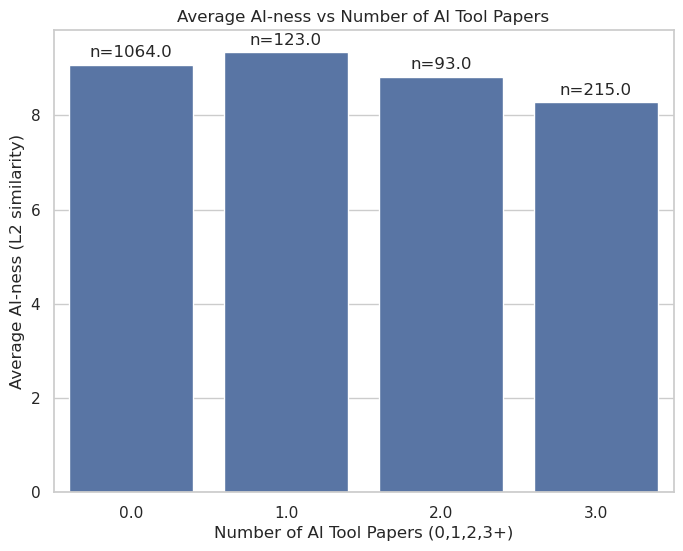

In [39]:
# Bar chart: AI-ness vs # of AI tool papers
# Create bins: 0,1,2,3+ AI tool papers
df_merged['ai_tool_bin'] = df_merged['is_using_ai_tool'].fillna(0)
df_merged['ai_tool_bin'] = df_merged['ai_tool_bin'].apply(lambda x: 3 if x >= 3 else x)

# Calculate mean L2 similarity and count per bin
bar_data = df_merged.groupby('ai_tool_bin')['l2_similarities'].agg(['mean', 'count']).reset_index()

plt.figure(figsize=(8,6))
sns.barplot(
    x='ai_tool_bin', 
    y='mean', 
    data=bar_data, 
)

# Add count above each bar
for idx, row in bar_data.iterrows():
    plt.text(idx, row['mean'] + 0.1, f"n={row['count']}", ha='center', va='bottom')

plt.xlabel("Number of AI Tool Papers (0,1,2,3+)")
plt.ylabel("Average AI-ness (L2 similarity)")
plt.title("Average AI-ness vs Number of AI Tool Papers")
plt.show()


### **Result**: 

All groups have very similar average AI-ness (all around ~9).

Authors with 0 or 1 AI tool paper have slightly higher averages than those with 2 or 3+, but the differences are small.

The 0-paper group is by far the largest (over 1000 authors), while the 1-, 2-, and 3+ groups are much smaller—so minor variations could be due to sampling variability.

### **Interpretation**:

There is no strong relationship between the number of AI tool papers an author has and their AI-ness score.
Small differences appear, but they are too small and inconsistent to suggest any meaningful trend.

/tmp/ipykernel_1021031/4098809337.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df_merged.pivot_table(


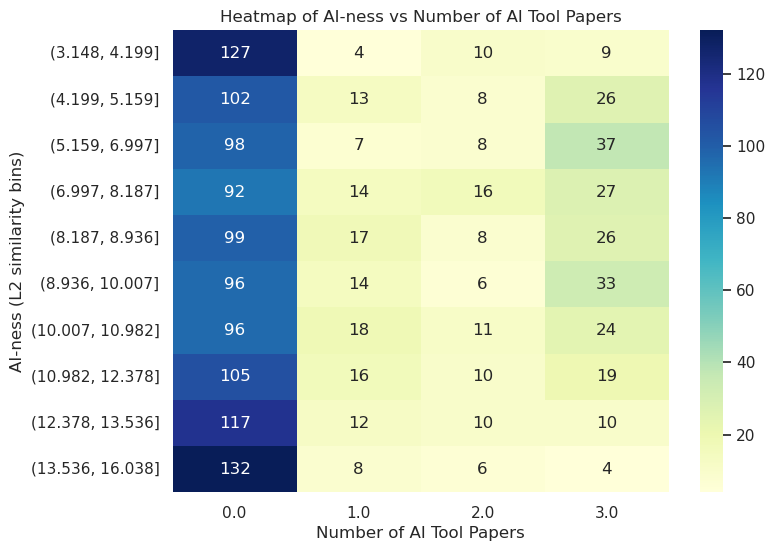

In [40]:
# Heatmap / 2D bin plot: AI-ness vs # of AI tool papers
# Discretize L2 similarity into bins (10 bins)
df_merged['l2_bin'] = pd.qcut(df_merged['l2_similarities'], q=10, duplicates='drop')

# Create pivot table: counts per (ai_tool_bin, l2_bin)
heatmap_data = df_merged.pivot_table(
    index='l2_bin', 
    columns='ai_tool_bin', 
    values='id', 
    aggfunc='count', 
    fill_value=0
)

plt.figure(figsize=(8,6))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt="d", 
    cmap="YlGnBu"
)
plt.xlabel("Number of AI Tool Papers")
plt.ylabel("AI-ness (L2 similarity bins)")
plt.title("Heatmap of AI-ness vs Number of AI Tool Papers")
plt.show()

## December 2nd Updates
- normalized x by dividing 
- given sum(x =0)
- since heat map is based on the highest number and lowest number, normalize vertically
- do sum(x=0 in the range)/sum(total x=0)


/tmp/ipykernel_1021031/1458733497.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df_merged.pivot_table(


Fraction of x=0 per bin:
l2_bin
(3.148, 4.199]      0.119361
(4.199, 5.159]      0.095865
(5.159, 6.997]      0.092105
(6.997, 8.187]      0.086466
(8.187, 8.936]      0.093045
(8.936, 10.007]     0.090226
(10.007, 10.982]    0.090226
(10.982, 12.378]    0.098684
(12.378, 13.536]    0.109962
(13.536, 16.038]    0.124060
Name: count, dtype: float64


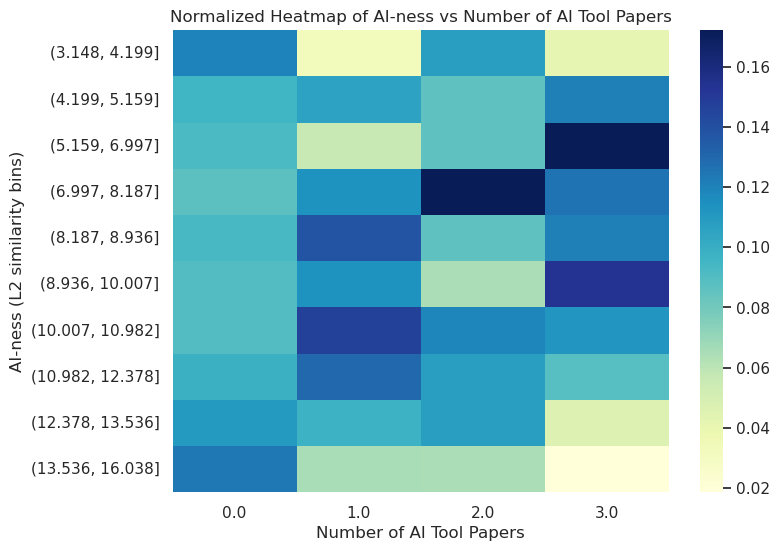

In [41]:
# 1. BIN AI-NESS (L2)
df_merged['l2_bin'] = pd.qcut(df_merged['l2_similarities'], q=10, duplicates='drop')

# 2. CREATE RAW COUNT TABLE
heatmap_data = df_merged.pivot_table(
    index='l2_bin',
    columns='ai_tool_bin',
    values='id',
    aggfunc='count',
    fill_value=0
)

# 3. COMPUTE: sum(x=0)
#    Count rows where ai_tool_bin = 0
df_zero = df_merged[df_merged['ai_tool_bin'] == 0]

# count x=0 per l2_bin
zero_counts = df_zero['l2_bin'].value_counts().sort_index()

# total x=0 across whole dataset
total_zero = len(df_zero)

# fraction: sum(x=0 in bin) / sum(total x=0)
zero_fraction_by_bin = zero_counts / total_zero

# optionally: print it
print("Fraction of x=0 per bin:")
print(zero_fraction_by_bin)

# 4. NORMALIZE HEATMAP VERTICALLY (COLUMN-WISE)
#    → each column divided by its column sum
heatmap_normalized = heatmap_data.div(heatmap_data.sum(axis=0), axis=1)

# 5. PLOT NORMALIZED HEATMAP
plt.figure(figsize=(8,6))
sns.heatmap(
    heatmap_normalized,
    annot=False,
    cmap="YlGnBu"
)
plt.xlabel("Number of AI Tool Papers")
plt.ylabel("AI-ness (L2 similarity bins)")
plt.title("Normalized Heatmap of AI-ness vs Number of AI Tool Papers")
plt.show()


### Results
After normalizing by column to examine within-group distributions, we find no strong monotonic relationship between the number of AI tool papers and AI-ness. Authors with 2 AI tool papers show a noticeable concentration in the mid-high similarity range, but otherwise AI-ness distributions appear broadly similar across groups. This suggests that AI-ness is not simply a function of AI tool usage.

### **Why Are the Numbers So High in the Heatmap When ai_tool_bin = 0?**

- Reason 1 — The vast majority of authors have zero AI-tool-related papers

In my data:
- Most authors are not cited in AI tool papers
- Only a relatively small number appear in 1, 2, or 3+ papers.

If 80% of our dataset belongs to category 0, then each bin will naturally show much larger numbers in that column.

### **Key observations**:

The leftmost column (0 AI papers) dominates the heatmap with large counts, because most authors have zero AI tool papers in the dataset.

Across all groups (0, 1, 2, 3+), authors cluster mostly in middle AI-ness bins, with fewer authors in extremely high or low AI-ness ranges.

The distributions for the 1, 2, and 3+ groups look similar to each other—no group shows a clearly higher or lower concentration in any particular region.

### **Interpretation**:

The heatmap reinforces the bar chart’s conclusion:
There is no major shift or pattern in AI-ness distribution as the number of AI tool papers increases.
All groups show very similar spread, with AI-ness largely centered in the same range.

---

## New Dataset: December 9th

In [42]:
dimension_similarites = pd.read_parquet("/share/yin/kk929_codes/schmidt/intermediates/20251202_dimension_similarities_samples.parquet")
dimensions_ai = pd.read_parquet("/share/yin/kk929_codes/schmidt/intermediates/20251202_dimension_ai_tool_use_samples.parquet")

In [43]:
dimension_similarites.head()

,id,title_preferred,abstract_preferred,for_first_level,for_second_level,l2_similarities,cos_similarities
0,pub.1119004998,ULTRACAM photometry of the eclipsing cataclysm...,"We present high-speed, three-colour photometry...","[{'id': '80022', 'code': '51', 'name': 'Physic...","[{'id': '80220', 'code': '5101', 'name': 'Astr...",9.573136,0.583186
1,pub.1011874464,Basic Fibroblast Growth Factor and Angiogenesis,Regenerative medicine using growth factors is ...,"[{'id': '80003', 'code': '32', 'name': 'Biomed...","[{'id': '80049', 'code': '3206', 'name': 'Medi...",21.216755,-0.635336
2,pub.1056058825,Maya Blue: A Computational and Spectroscopic S...,"Maya Blue pigment, used in pre-Colombian Ameri...","[{'id': '80005', 'code': '34', 'name': 'Chemic...","[{'id': '80070', 'code': '3406', 'name': 'Phys...",14.928226,-0.407066
3,pub.1031460153,A local formulation of lattice Wess-Zumino mod...,A lattice Wess-Zumino model is formulated on t...,"[{'id': '80020', 'code': '49', 'name': 'Mathem...","[{'id': '80209', 'code': '4902', 'name': 'Math...",10.601443,0.140219
4,pub.1064448340,Self-excited vibratory drilling: A dimensionle...,Drilling assisted by axial vibrations at a low...,"[{'id': '80011', 'code': '40', 'name': 'Engine...","[{'id': '80122', 'code': '4014', 'name': 'Manu...",13.789134,-0.555284


In [44]:
dimensions_ai.head()

,id,num_references,is_using_ai_tool
0,pub.1000001902,29,0.0
1,pub.1000002603,18,0.0
2,pub.1000003048,28,0.0
3,pub.1000003358,10,0.0
4,pub.1000003810,21,0.0


## Descriptive Anaylsis of Dimension Dataset AIness Metric

In [61]:
print("=== L2 Similarity Stats ===")
print(dimension_similarites["l2_similarities"].describe())
print()

print("=== Cosine Similarity Stats ===")
print(dimension_similarites["cos_similarities"].describe())
print()

=== L2 Similarity Stats ===
count    210000.000000
mean         17.675190
std           3.425007
min           8.181110
25%          14.765352
50%          17.950356
75%          20.525848
max          24.538855
Name: l2_similarities, dtype: float64

=== Cosine Similarity Stats ===
count    210000.000000
mean         -0.661416
std           0.283585
min          -1.000000
25%          -0.885853
50%          -0.708677
75%          -0.559498
max           0.690832
Name: cos_similarities, dtype: float64



### Apply `extract_first_level_name` to Dimensions dataset

In [45]:
dimension_similarites["name_category"] = dimension_similarites["for_first_level"].apply(extract_first_level_name)

print(dimension_similarites.groupby("name_category")["l2_similarities"].describe())

                                              count       mean       std  \
name_category                                                              
Agricultural, Veterinary and Food Sciences   7618.0  17.882565  1.576487   
Biological Sciences                         16873.0  18.904812  1.717942   
Biomedical and Clinical Sciences            42345.0  21.411711  1.651511   
Built Environment and Design                 3042.0  16.304064  1.780810   
Chemical Sciences                           14882.0  14.607084  1.847809   
Commerce, Management, Tourism and Services   8025.0  17.717142  1.448723   
Creative Arts and Writing                    2355.0  19.500223  1.522639   
Earth Sciences                               5782.0  15.855683  1.340741   
Economics                                    2377.0  17.828287  1.382066   
Education                                    4133.0  19.313660  1.065284   
Engineering                                 31908.0  14.385466  2.044739   
Environmenta

In [46]:
dimension_similarites["name_category"].value_counts(dropna=False)

name_category
Biomedical and Clinical Sciences              42345
Engineering                                   31908
Biological Sciences                           16873
None                                          16478
Chemical Sciences                             14882
Information and Computing Sciences            13191
Physical Sciences                              8652
Commerce, Management, Tourism and Services     8025
Agricultural, Veterinary and Food Sciences     7618
Mathematical Sciences                          7053
Health Sciences                                6614
Earth Sciences                                 5782
Human Society                                  5641
Education                                      4133
Built Environment and Design                   3042
Psychology                                     2846
Language, Communication and Culture            2718
Economics                                      2377
Creative Arts and Writing                      235

In [47]:
total_name_category = len(dimension_similarites["name_category"].value_counts(dropna=False))
print("The total number of categories are",total_name_category)

The total number of categories are 23


/tmp/ipykernel_1021031/4280523401.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(mean_l2.index, rotation=90)
/tmp/ipykernel_1021031/4280523401.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(mean_cos.index, rotation=90)


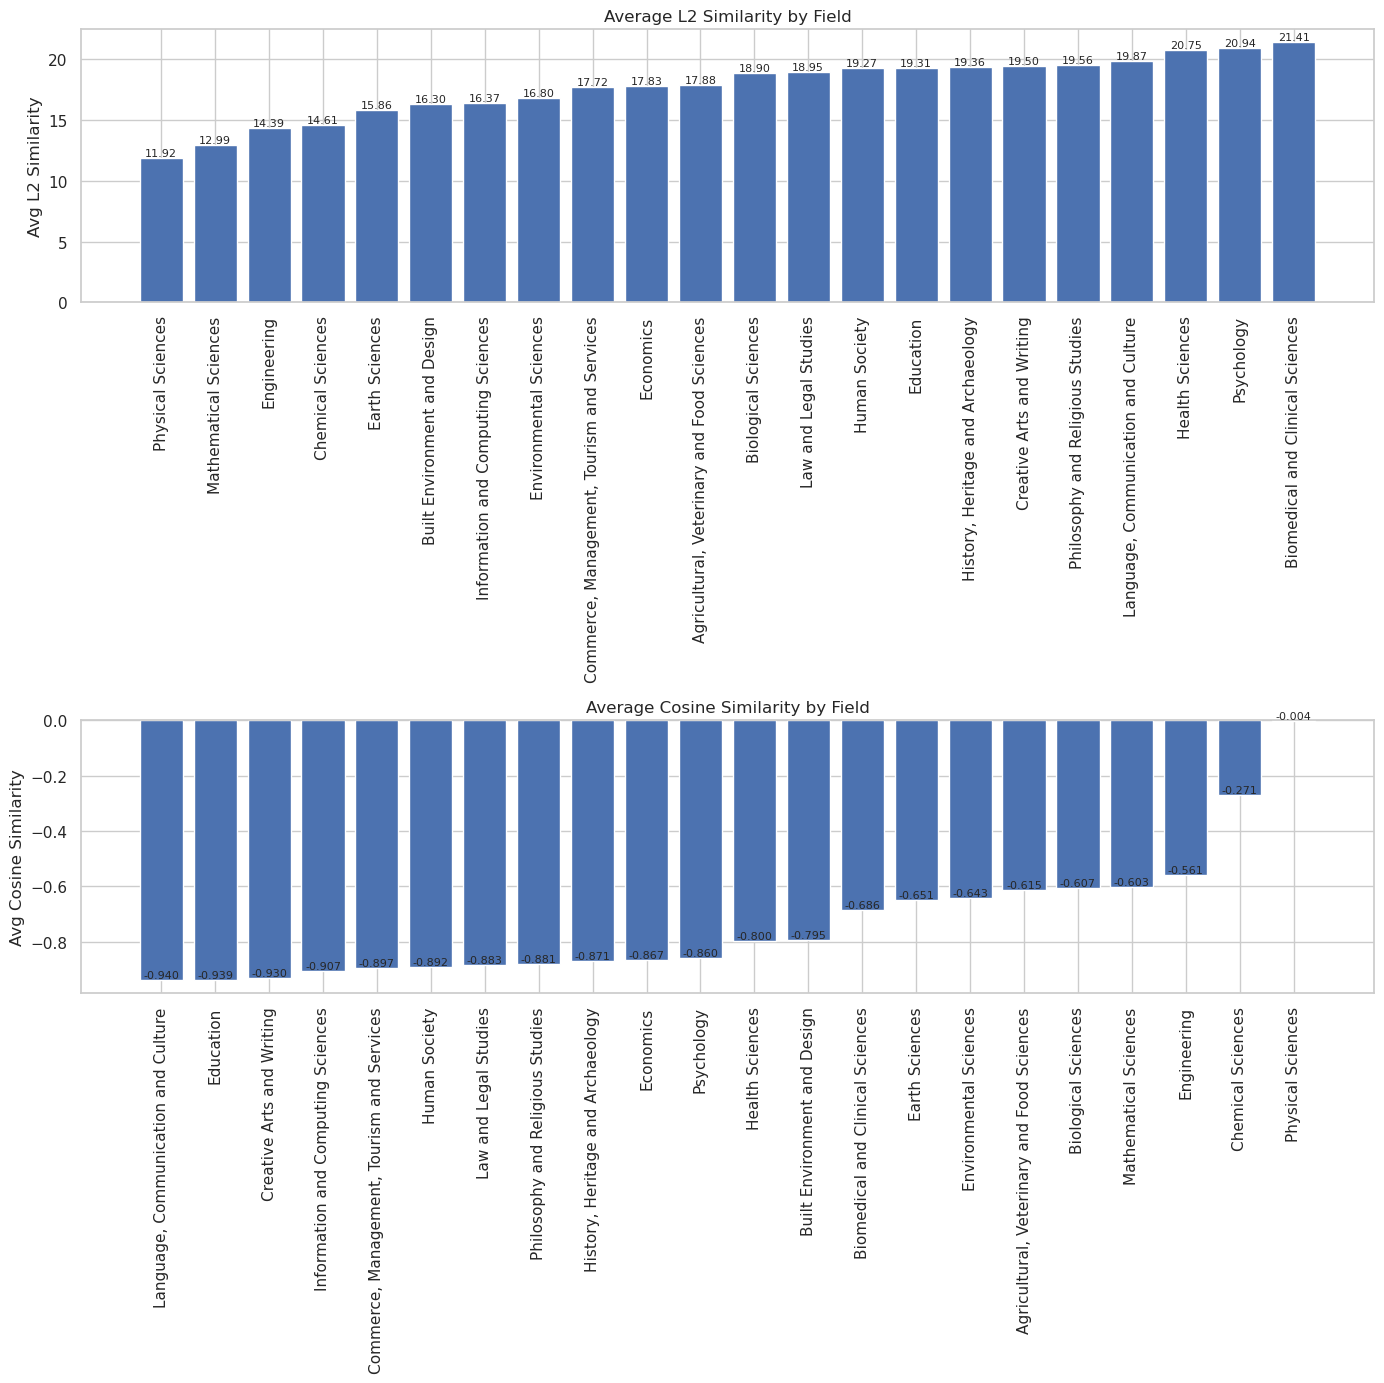

In [48]:
# Compute averages
mean_l2 = dimension_similarites.groupby("name_category")["l2_similarities"].mean().sort_values()
mean_cos = dimension_similarites.groupby("name_category")["cos_similarities"].mean().sort_values()

# Create vertical layout (2 rows, 1 column)
fig, axes = plt.subplots(2, 1, figsize=(14, 14))

# ---------------------------
# Plot 1: L2 similarity
# ---------------------------
bars_l2 = axes[0].bar(mean_l2.index, mean_l2.values)

axes[0].set_title("Average L2 Similarity by Field")
axes[0].set_ylabel("Avg L2 Similarity")
axes[0].set_xticklabels(mean_l2.index, rotation=90)

# Add labels above bars
for bar in bars_l2:
    height = bar.get_height()
    axes[0].text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=8
    )

# ---------------------------
# Plot 2: Cosine similarity
# ---------------------------
bars_cos = axes[1].bar(mean_cos.index, mean_cos.values)

axes[1].set_title("Average Cosine Similarity by Field")
axes[1].set_ylabel("Avg Cosine Similarity")
axes[1].set_xticklabels(mean_cos.index, rotation=90)

# Add labels above bars
for bar in bars_cos:
    height = bar.get_height()
    axes[1].text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{height:.3f}",
        ha="center",
        va="bottom",
        fontsize=8
    )

plt.tight_layout()
plt.show()

### Creates CSV file for ones w/o Abstract Preferred in Dimensions

It seems to be that there are no papers in Dimensions where `Abstract Preferred` is None

In [49]:
# Filter rows where the abstract_preferred is None
missing_abstract_dimensions = dimension_similarites[dimension_similarites["abstract_preferred"].isna()]

# Specify the output path
output_path = "/share/yin/nz268/missing_category_papers_dimensions.csv"

# Save to CSV
missing_abstract_dimensions.to_csv(output_path, index=False)
print(f"✅ CSV saved for papers with missing abstract_preferred at:\n{output_path}")

missing_abstract_dimensions.head()

✅ CSV saved for papers with missing abstract_preferred at:
/share/yin/nz268/missing_category_papers_dimensions.csv


,id,title_preferred,abstract_preferred,for_first_level,for_second_level,l2_similarities,cos_similarities,name_category


## Checks what additional categories are in Dimensions and not Fellowship Dataset

In [59]:
# Unique categories as sets
categories_df = set(df["name_category"].dropna().astype(str))
categories_dim = set(dimension_similarites["name_category"].dropna().astype(str))

# Find categories in df but not in dimension_similarites
missing_categories = categories_dim - categories_df 

print("Categories in dimension_similarites but missing in df:")
for cat in missing_categories:
    print(cat)


Categories in dimension_similarites but missing in df:
Creative Arts and Writing
History, Heritage and Archaeology
Philosophy and Religious Studies
